HR Analytics is kind of people analytics which is a data driven approach for managing people at work. 
The analytics concern about hiring, assesment, learning and development, retention, team composition, performance evaluation and others.   


In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("turnover.csv")

# Take a quick look to the first 5 rows of data
print(data.head())

# Get some information on the types of variables in data
data.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 column

In [3]:
"""
Categorical variables are variables that receive a limited number of values that describe a category. 
They can be of two types:

Ordinal – variables with two or more categories that can be ranked or ordered (e.g. “low”, “medium”, “high”)
Nominal – variables with two or more categories that do not have an intrinsic order (e.g. “men”, “women”)

n your dataset:

salary is an ordinal variable
department is a nominal variable

"""
# Print the unique values of the "department" column
print(data.department.unique())

# Print the unique values of the "salary" column
print(data.salary.unique())


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [4]:
"""As salary is a ordinal variable it can be changed with reordering aka numbering such as 0,1,2 """
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes


# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.tail())


       IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
14994   0      0           0   0           0          0            0      0   
14995   0      0           0   0           0          0            0      0   
14996   0      0           0   0           0          0            0      0   
14997   0      0           0   0           0          0            0      0   
14998   0      0           0   0           0          0            0      0   

       support  technical  
14994        1          0  
14995        1          0  
14996        1          0  
14997        1          0  
14998        1          0  


In [5]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)
data

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [6]:
"""The column churn is providing information about whether an employee has left the company or not is the column churn:

if the value of this column is 0, the employee is still with the company
if the value of this column is 1, then the employee has left the company

we will get percentage of employee left the company
"""

n_employees = len(data)
print(data.churn.value_counts())
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


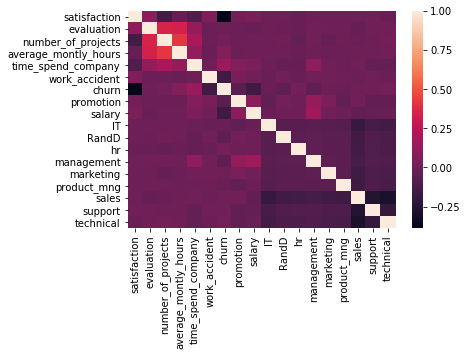

In [7]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

#### Predictive Analysis

In [8]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)
# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

In [9]:
#sample Gini
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.060995563603440474

In [10]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A < gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


In [11]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

#Checking the accuracy of prediction

"""how well your trained model can make predictions! Let’s use your testing set to check the accuracy of your Decision Tree model, with the score() method."""
# Check the accuracy score of the prediction for the training set
model.score(features_train,target_train)*100

# Check the accuracy score of the prediction for the test set
model.score(features_test,target_test)*100

97.22666666666666

Exporting the tree

Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, we have overfitting in your results. This can also be learned from the tree visualization.

In [15]:
# Import the graphical visualization export function
from sklearn import tree
import graphviz    
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
dot_data = export_graphviz(model,out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("churn")

'churn.pdf'

Pruning the tree
Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:

“Pruning” the tree and setting a limit on the maximum depth it can have.
Limiting the minimum number of observations in one leaf of the tree.

In [13]:
"""We will:

prune the tree and limit the growth of the tree to 5 levels of depth
fit it to the employee data
test prediction results on both training and testing sets."""


# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

97.71535247577563


In [14]:
""" Limiting the sample size
    
        set this minimum limit to 100
        fit the new model to the employee data
        examine prediction results on both training and test sets

"""


# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf =100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


In [16]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9240641711229947

In [17]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9632107023411371

In [18]:
# Calculating the ROC/AUC score
"""The combination of those two results in the ROC curve allows us to measure both recall and precision. 
The area under the ROC curve is calculated as the AUC score."""
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)


0.9691623087590718

Balancing classes

It can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. 
To solve the imbalance, equal weights are usually given to each class. 
Using the class_weight argument in sklearn's DecisionTreeClassifier, one can make the classes become "balanced".


Let’s correct our model by solving its imbalance problem:

first, you’re going to set up a model with balanced classes
then, you will fit it to the training data
finally, you will check its accuracy on the test set



In [ ]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

In [19]:
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score
print(recall_score(target_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test,prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


In [21]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)
parameters

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_samples_leaf': [50, 100, 150, 200, 250, 300, 350, 400, 450]}

In [22]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [24]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an indnex
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.499958
evaluation,0.153005
time_spend_company,0.139567
number_of_projects,0.098877
average_montly_hours,0.088262
salary,0.006250
technical,0.003929
support,0.002248
sales,0.001549
RandD,0.001415


In [26]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]
selected_list

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [27]:
# Initialize the best model using parameters provided in description
model_best = DecisionTreeClassifier(max_depth=8, min_samples_leaf=150, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)


95.28
91.75027870680044
94.07002193314084
